In [157]:
display(Markdown("# Importer les bibliothèques nécessaires"))
display(Markdown("Importation des bibliothèques: Les bibliothèques utilisées dans ce modèle incluent Pandas pour manipuler des données, Numpy pour traiter des tableaux numériques, Matplotlib et Seaborn pour la visualisation des données, et Keras pour construire le modèle de traitement de texte."))

# Importer les bibliothèques nécessaires

Importation des bibliothèques: Les bibliothèques utilisées dans ce modèle incluent Pandas pour manipuler des données, Numpy pour traiter des tableaux numériques, Matplotlib et Seaborn pour la visualisation des données, et Keras pour construire le modèle de traitement de texte.

In [246]:
import numpy as np
import pandas as pd
# sont utilisés pour créer des visualisations à partir des données.
import matplotlib.pyplot as plt
import seaborn as sns

# est utilisé pour les statistiques avancées.
import scipy.stats as stats

# est utilisé pour séparer les données en jeux de données d'entraînement et de test.
from IPython.display import display, Markdown
#est utilisé pour la tokenization, la suppression des mots vides et la lemmatisation.
!pip install spacy
#est utilisé pour construire et entraîner des modèles de réseaux de neurones.
!pip install keras

#est utilisé comme backend pour exécuter les modèles de keras.
!pip install tensorflow

#est utilisé pour créer des nuages de mots à partir des tweets.
!pip install wordcloud

from sklearn.model_selection import train_test_split

# est utilisé pour évaluer les performances du modèle (classification_report, precision_recall_curve)
from sklearn.metrics import classification_report, precision_recall_curve

#sont utilisés pour nettoyer les données de tweets (supprimer les caractères de ponctuation, les liens web, etc.)
import re
import string

#est utilisé pour afficher une barre de progression pour les boucles longues.
import tqdm

# est utilisé pour la tokenization, la suppression des mots vides, la lemmatisation et la fréquence des mots.
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#est utilisé pour la tokenization, la suppression des mots vides et la lemmatisation.
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
lemma = WordNetLemmatizer()

#est utilisé pour construire et entraîner des modèles de réseaux de neurones.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization,SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.optimizers import Adam


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\Users\HP\anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

In [250]:
display(Markdown("# Charger les données"))
display(Markdown("Les données d'entraînement sont stockées dans le DataFrame train, les données de test dans le DataFrame test et les données de soumission dans le DataFrame submission. Les données d'entraînement sont utilisées pour entraîner le modèle, les données de test sont utilisées pour évaluer les performances du modèle et les données de soumission sont utilisées pour soumettre les résultats du modèle à un concours ou à un défi en ligne."))

# Charger les données

Les données d'entraînement sont stockées dans le DataFrame train, les données de test dans le DataFrame test et les données de soumission dans le DataFrame submission. Les données d'entraînement sont utilisées pour entraîner le modèle, les données de test sont utilisées pour évaluer les performances du modèle et les données de soumission sont utilisées pour soumettre les résultats du modèle à un concours ou à un défi en ligne.

In [251]:


train= pd.read_csv('C:/Users/HP/Downloads/Disaster-Tweets-Kaggle-main/Disaster-Tweets-Kaggle-main/data/train.csv')
test=pd.read_csv('C:/Users/HP/Downloads/Disaster-Tweets-Kaggle-main/Disaster-Tweets-Kaggle-main/data/test.csv')
submission = pd.read_csv('C:/Users/HP/Downloads/Disaster-Tweets-Kaggle-main/Disaster-Tweets-Kaggle-main/data/sample_submission.csv')

In [252]:
# Ces lignes de code impriment des informations sur les tailles des DataFrames de données d'entraînement et de test. La fonction shape de pandas renvoie un tuple contenant le nombre de lignes et de colonnes dans un DataFrame.
print('There are {} rows and {} columns in train set'.format(df_train.shape[0],df_train.shape[1]))
print('There are {} rows and {} columns in test set'.format(df_test.shape[0],df_test.shape[1]))

There are 7613 rows and 5 columns in train set
There are 3263 rows and 4 columns in test set


In [253]:
#Cette ligne de code affiche les 10 premières lignes du DataFrame de données 
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [254]:
# Ces lignes de code créent un DataFrame qui contient des informations sur les valeurs manquantes dans le DataFrame de données d'entraînement.
missing_val = pd.DataFrame(train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,keyword,61
2,location,2533
3,text,0
4,target,0


In [255]:
#générer des statistiques descriptives sur les données d'entraînement
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [256]:
display(Markdown("# Nettoyage et prétraitement des données"))
display(Markdown("Prétraitement des données: Les tweets sont nettoyés en enlevant les caractères spéciaux, les mentions d'utilisateurs, les liens et les hashtags. Les tweets sont également converties en minuscules."))

# Nettoyage et prétraitement des données

Prétraitement des données: Les tweets sont nettoyés en enlevant les caractères spéciaux, les mentions d'utilisateurs, les liens et les hashtags. Les tweets sont également converties en minuscules.

In [257]:
# Ces lignes de code définissent des fonctions pour nettoyer les données de tweets en supprimant les URL, les émoticônes, les balises HTML et la ponctuation.
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

train['clean_text'] = train['text'].apply(lambda x: remove_URL(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_emoji(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_html(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_punct(x))

In [258]:
# tokenizer les tweets nettoyés en utilisant la fonction apply() de pandas.
train['tokenized'] = train['clean_text'].apply(word_tokenize)

In [259]:
# vérifier si les fonctions de nettoyage et de tokenization ont été correctement appliquées aux données d'entraînement
train.head()

,id,keyword,location,text,target,clean_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [260]:
# Ces lignes de code utilisent la fonction apply() pour mettre en minuscule les mots et retirer les mots de stopwords des tweets tokenizés.
train['lower'] = train['tokenized'].apply(
    lambda x: [word.lower() for word in x])

train['no_stopwords'] = train['lower'].apply(
    lambda x: [word for word in x if word not in set(nltk.corpus.stopwords.words('english'))])

In [261]:
# Cette ligne de code utilise une compréhension de liste pour joindre les mots tokenisés sans stopwords en utilisant espace comme séparateur.
train['no_stopwords'] = [' '.join(map(str, l)) for l in train['no_stopwords']]

In [262]:
#vérifier si les tweets ont été correctement converti en chaîne de caractères et stockés dans la colonne no_stopwords. 
train.head()

,id,keyword,location,text,target,clean_text,tokenized,lower,no_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...",deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...",got sent photo ruby alaska smoke wildfires pou...


In [263]:
# ces lignes de code effectuent les mêmes étapes de nettoyage et de tokenization sur les données de test que sur les données d'entraînement. Les fonctions de nettoyage (remove_URL, remove_emoji, remove_html, remove_punct) sont appliquées aux tweets dans le DataFrame de test pour supprimer les informations inutiles.
test['clean_text'] = test['text'].apply(lambda x: remove_URL(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_emoji(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_html(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_punct(x))

test['tokenized'] = test['clean_text'].apply(word_tokenize)

test['lower'] = test['tokenized'].apply(
    lambda x: [word.lower() for word in x])

test['no_stopwords'] = test['lower'].apply(
    lambda x: [word for word in x if word not in set(nltk.corpus.stopwords.words('english'))])

test['no_stopwords'] = [' '.join(map(str, l)) for l in test['no_stopwords']]

In [264]:
# Cette ligne de code utilise la fonction tolist() pour convertir les colonnes 'no_stopwords' des dataframes d'entraînement et de test en listes de chaînes de caractères.
combined = train['no_stopwords'].tolist() + test['no_stopwords'].tolist()

In [268]:
# nombre total de tweets dans les données d'entraînement et de test combinées.
len(combined)

10876

In [269]:
display(Markdown("# L'analyse exploratoire des données"))
display(Markdown(""))

# L'analyse exploratoire des données

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


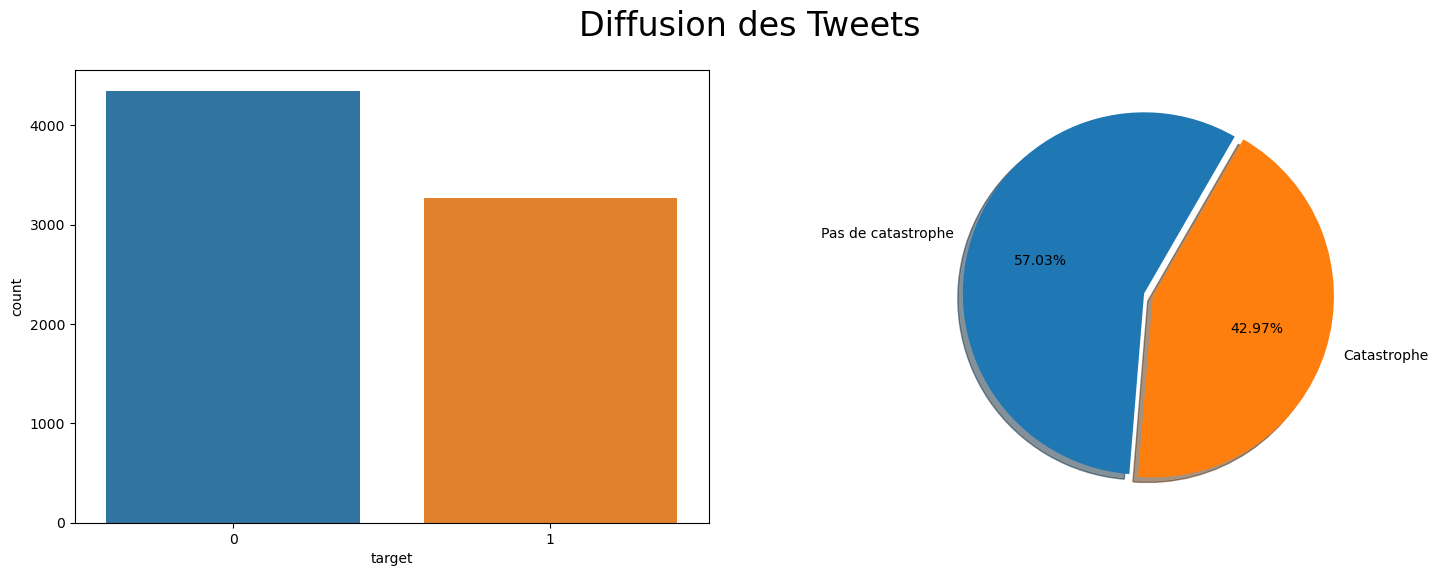

In [270]:
# visualiser la répartition des cibles dans les données d'entraînement.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(train['target'], ax=axes[0])
axes[1].pie(train['target'].value_counts(),
            labels=['Pas de catastrophe', 'Catastrophe'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Diffusion des Tweets', fontsize=24)
plt.show()

In [271]:
display(Markdown("# Nuage de mots pour tous les tweets catastrophe"))
display(Markdown(""))

# Nuage de mots pour tous les tweets catastrophe

In [272]:
# stocker un ensemble de mots de stopwords en anglais dans une variable appelée stopwords.
import nltk
stopwords = nltk.corpus.stopwords.words('english')

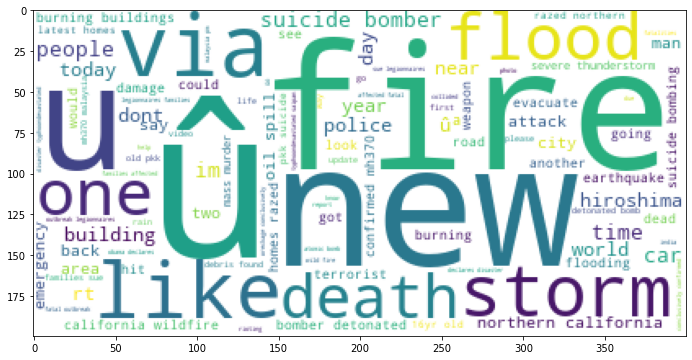

In [273]:
#  nuage de mots à partir des tweets de catastrophe dans les données d'entraînement
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(train.no_stopwords[train['target']==1])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [274]:
display(Markdown("# Mots dans un tweet traité"))
display(Markdown(""))

# Mots dans un tweet traité

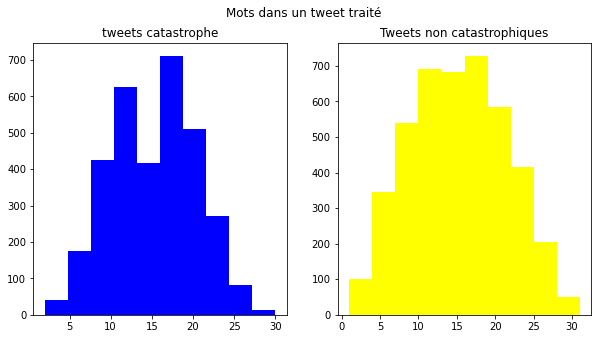

In [275]:
# histogrammes pour visualiser la distribution de la longueur des tweets de catastrophe et des tweets non de catastrophe dans les données d'entraînement
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('tweets catastrophe')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='yellow')
ax2.set_title('Tweets non catastrophiques')
fig.suptitle('Mots dans un tweet traité')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Longueur moyenne des mots dans chaque tweet traité')

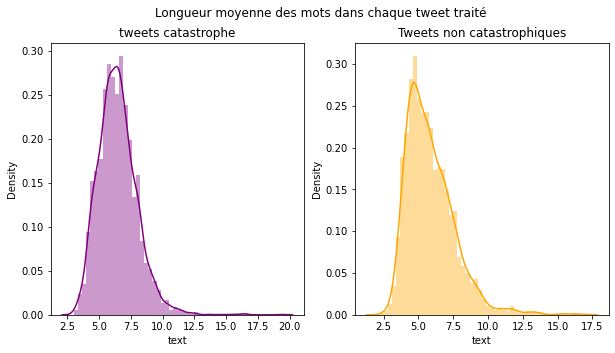

In [277]:
#histogrammes montrent la répartition de la longueur des mots dans les tweets de catastrophe et non de catastrophe dans les données d'entraînement
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='purple')
ax1.set_title('tweets catastrophe')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='orange')
ax2.set_title('Tweets non catastrophiques')
fig.suptitle('Longueur moyenne des mots dans chaque tweet traité')

In [278]:
display(Markdown("# Création de l'intégration de nos tweets à l'aide des intégrations GloVe"))
display(Markdown(""))

# Création de l'intégration de nos tweets à l'aide des intégrations GloVe

In [279]:
# Ces lignes de code utilisent le fichier de vecteurs pré-entraînés GloVe (Global Vectors for Word Representation) pour créer un index d'incorporations de mots.
embeddings_index = dict()
f = open('C:/Users/HP/Downloads/Disaster-Tweets-Kaggle-main/Disaster-Tweets-Kaggle-main/data/glove.6B.100d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [280]:
#convertir les tweets en vecteurs pour une utilisation dans les modèles de traitement de langage naturel.
!pip install --upgrade keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len_tweet = 50

tok = Tokenizer()
tok.fit_on_texts(combined)
vocab_size = len(tok.word_index) + 1
encoded_tweet = tok.texts_to_sequences(combined)
padded_tweet = pad_sequences(encoded_tweet, maxlen=max_len_tweet, padding='post')

vocab_size = len(tok.word_index) + 1

tweet_embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tok.word_index.items():
    t_embedding_vector = embeddings_index.get(word)
    if t_embedding_vector is not None:
        tweet_embedding_matrix[i] = t_embedding_vector

In [281]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Initialiser le modèle
model = Sequential()

# Ajouter les couches de votre modèle
model.add(Embedding(vocab_size, output_dim=128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(padded_tweet[:7613], train['target'].values, epochs = 11)


Epoch 1/11
238/238 [==============================] - 37s 141ms/step - loss: 0.6844 - accuracy: 0.5698
Epoch 2/11
238/238 [==============================] - 25s 106ms/step - loss: 0.6839 - accuracy: 0.5703
Epoch 3/11
238/238 [==============================] - 28s 116ms/step - loss: 0.6840 - accuracy: 0.5703
Epoch 4/11
238/238 [==============================] - 26s 109ms/step - loss: 0.6839 - accuracy: 0.5703
Epoch 5/11
238/238 [==============================] - 28s 116ms/step - loss: 0.6837 - accuracy: 0.5703
Epoch 6/11
238/238 [==============================] - 26s 111ms/step - loss: 0.6837 - accuracy: 0.5703
Epoch 7/11
238/238 [==============================] - 25s 107ms/step - loss: 0.6469 - accuracy: 0.6268
Epoch 8/11
238/238 [==============================] - 25s 105ms/step - loss: 0.5693 - accuracy: 0.7337
Epoch 9/11
238/238 [==============================] - 24s 102ms/step - loss: 0.5481 - accuracy: 0.7487
Epoch 10/11
238/238 [==============================] - 25s 104ms/step - l

In [323]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2896768   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,028,481
Trainable params: 3,028,481
Non-trainable params: 0
_________________________________________________________________


In [282]:
display(Markdown("# Ensemble de test"))
display(Markdown(""))

# Ensemble de test

In [283]:
# visualiser les 5 premières lignes du Dataframe test
test.head()

,id,keyword,location,text,clean_text,tokenized,lower,no_stopwords
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,"[Just, happened, a, terrible, car, crash]","[just, happened, a, terrible, car, crash]",happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,"[Heard, about, earthquake, is, different, citi...","[heard, about, earthquake, is, different, citi...",heard earthquake different cities stay safe ev...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[there, is, a, forest, fire, at, spot, pond, g...",forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,"[Apocalypse, lighting, Spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,"[Typhoon, Soudelor, kills, 28, in, China, and,...","[typhoon, soudelor, kills, 28, in, china, and,...",typhoon soudelor kills 28 china taiwan


In [284]:
# Utilise le modèle entraîné précédemment pour faire des prédictions sur les tweets de test. Ces prédictions sont des valeurs comprises entre 0 et 1 qui indiquent la probabilité que le tweet soit considéré comme étant un tweet de catastrophe.
preds = model.predict(padded_tweet[7613:])

102/102 [==============================] - 3s 20ms/step


In [285]:
# afficher les 20 premières valeurs de la variable preds qui contient les prédictions du modèle pour les tweets de test.
preds[:20]

array([[0.28235692],
       [0.8849641 ],
       [0.8849652 ],
       [0.28235623],
       [0.884965  ],
       [0.28235695],
       [0.2823564 ],
       [0.28235623],
       [0.2823562 ],
       [0.28235617],
       [0.28235614],
       [0.2823562 ],
       [0.28235617],
       [0.2823562 ],
       [0.28235623],
       [0.28235674],
       [0.28235632],
       [0.28235683],
       [0.28235617],
       [0.2823566 ]], dtype=float32)

In [286]:
#  redimensionne le tableau en un vecteur 1D de longueur 3263, qui correspond au nombre de tweets de test
# pred=[1 if i>0.5 else 0 for i in preds]
pred = np.round(preds).astype(int).reshape(3263)

In [287]:
pred

array([0, 1, 1, ..., 1, 0, 1])

In [288]:
# crée un nouveau Dataframe vide nommé submission qui servira à stocker les prédictions pour les tweets de test.
submission=pd.DataFrame()
submission['id']=test['id'].to_list()
submission['target']=pred

In [289]:
# vérifier que les identifiants de tweets de test et les prédictions ont été ajoutés correctement au Dataframe, et de vérifier que les prédictions ont des valeurs raisonnables.
submission.head(10)

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [96]:
#enregistre le Dataframe submission dans un fichier csv nommé submission4.csv
submission.to_csv('submission4.csv',index=False)

In [316]:
!pip install gradio

In [318]:
import gradio as gr

def predict_disaster(tweet):
    tweet = tok.texts_to_sequences([tweet])
    tweet = pad_sequences(tweet, maxlen=max_len_tweet, padding='post')
    pred = model.predict(tweet)
    return "Catastrophe" if pred[0] > 0.5 else "Non Catastrophe"

interface = gr.Interface(predict_disaster, gr.inputs.Textbox(label="Entrer un tweet"), gr.outputs.Label(label="Résultat"))
interface.launch() 

C:\Users\HP\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
